In [1]:
import os
import glob
import itertools
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score , recall_score

In [2]:
def create_folder(temp_path):
    if os.path.isdir(temp_path):
        pass
    else:
        os.mkdir(temp_path)
        
def change_value_(x):
    if x >= 3:
        return 1
    else:
        return 0
    
    
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==0:
            TP += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==1:
            TN += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FN += 1

    return TP, FP, TN, FN

In [3]:
# 파일 불러오기
data_type = "test"; predict_time = 1; data_folder_name = "test_1"
data_path = f"./datasets/{data_folder_name}/"
if len(glob.glob(f"{data_path}*{data_type}*predict_{predict_time}*")) != 1:
    print("Invalid file path")
else:
    temp_data_path = glob.glob(f"{data_path}*{data_type}*predict_{predict_time}*")[0]
temp_df = pd.read_csv(temp_data_path, index_col=0)


# Multi Class에 대한 결과 불러오기
y_pred = temp_df.iloc[:,0]
y_true = temp_df.iloc[:,1]
temp_multi_matrix = confusion_matrix(y_true, y_pred)

multiclass_accuracy = temp_multi_matrix.diagonal().sum()/temp_multi_matrix.sum()
precision = precision_score(y_true, y_pred,average= "macro")
recall = recall_score(y_true, y_pred,average= "macro")
each_class_acc = temp_multi_matrix.diagonal()/temp_multi_matrix.sum(axis=1)

print(temp_data_path, "-> 파일에 대한 결과")
print('[Multi] 정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}'.
      format(multiclass_accuracy, precision, recall))
print("각 클래스별 정확도 : ", each_class_acc)


# Multi Class를 Binary로 변환(3,4,5 -> 1 / 0,1,2 -> 0)
temp_bi_df = temp_df.copy()
temp_bi_df['Model'] = temp_df['Model'].apply(change_value_)
temp_bi_df['Target'] = temp_df['Target'].apply(change_value_)

bi_y_pred = temp_bi_df.iloc[:,0]
bi_y_true = temp_bi_df.iloc[:,1]
temp_binary_matrix = confusion_matrix(bi_y_true, bi_y_pred)
temp_f1_score = f1_score(bi_y_true, bi_y_pred, pos_label=0)

TP, FP, TN, FN = perf_measure(bi_y_true, bi_y_pred)
bi_recall = TP / (TP+FN)
bi_precision = TP / (TP+FP)
bi_far = FP / (TP+FP)
bi_pofd = FP / (TN+TP)
bi_tss = bi_recall - bi_pofd

# print(temp_data_path, "-> 파일에 대한 결과")
print('[Binary] F1-Score : {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, TSS: {:.4f}'.
      format(temp_f1_score, bi_precision, bi_recall, bi_tss))

./datasets/test_1\565_lstm_test_result_predict_1.csv -> 파일에 대한 결과
[Multi] 정확도: 0.7747, 정밀도: 0.4219, 재현율: 0.5060
각 클래스별 정확도 :  [0.73529412 0.20833333 0.14285714 0.50378788 0.57128614 0.87462687]
[Binary] F1-Score : 0.5068, 정밀도: 0.4512, 재현율: 0.5781, TSS: 0.5586


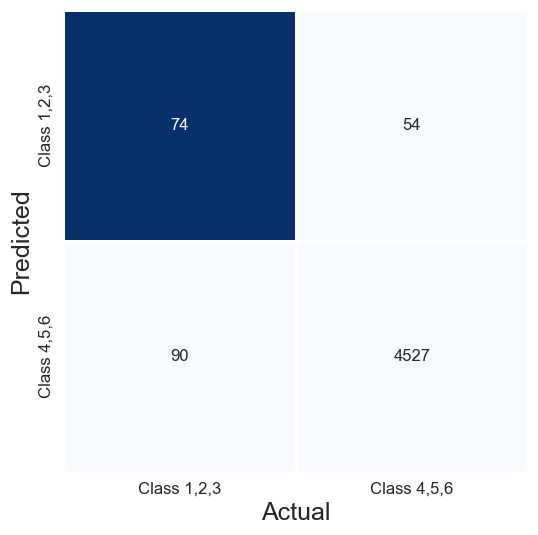

In [4]:
figsize = (6,6)
font_size = 12
annot_font_size = 12
label_fontsize = 18
cmap='Blues'
categories = ['Class 1,2,3', 'Class 4,5,6']
# categories = ['Fog', 'Not Fog']
line_width = 2
x_label = "Actual"
y_label = "Predicted"
cbar = False
save_path = 'D:/Coding/pycharm/result/'
file_name = f"binary_confusion_{data_type}_{predict_time}"

plt.figure(figsize=figsize)
plt.rcParams['axes.grid'] = True
plt.rcParams["font.size"] = font_size  # set fontsize
temp_ = np.array([[  1,  0],
                  [  0, 0]])
sns.heatmap(temp_,
            annot = temp_binary_matrix,
            annot_kws={"fontsize":annot_font_size},
            fmt="",
            cmap=cmap,
            cbar=cbar,
            xticklabels=categories,
            yticklabels=categories, 
            linewidths = line_width, 
            linecolor = 'white', 
            vmin=0)


plt.xlabel(x_label, fontdict = {"fontsize":label_fontsize})
plt.ylabel(y_label, fontdict = {"fontsize":label_fontsize})
plt.grid(False)
plt.savefig(f'{save_path}{file_name}.png', bbox_inches='tight', dpi=300)
plt.show()

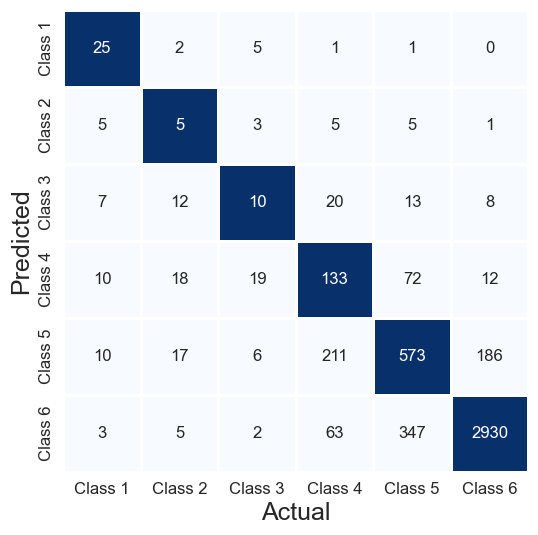

In [5]:
figsize = (6,6)
font_size = 12
annot_font_size = 12
label_fontsize = 18
cmap='Blues'
categories = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', "Class 6" ]
# categories = ['0~200', '200~500', '500~1000', '1000~2000', '2000~5000', "5000~" ]
line_width = 2
x_label = "Actual"
y_label = "Predicted"
cbar = False
file_name = f"multi_confusion_{data_type}_{predict_time}"

plt.figure(figsize=figsize)
plt.rcParams['axes.grid'] = True
plt.rcParams["font.size"] = font_size  # set fontsize
temp_ = np.array([[1, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 1],])
sns.heatmap(temp_,
            annot = temp_multi_matrix,
            annot_kws={"fontsize":annot_font_size},
            fmt="",
            cmap=cmap,
            cbar=cbar,
            xticklabels=categories,
            yticklabels=categories, 
            linewidths = line_width, 
            linecolor = 'white', 
            vmin=0)


plt.xlabel(x_label, fontdict = {"fontsize":label_fontsize})
plt.ylabel(y_label, fontdict = {"fontsize":label_fontsize})
plt.grid(False)
plt.savefig(f'{save_path}{file_name}.png', bbox_inches='tight', dpi=300)
plt.show()